![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.



In [57]:
# Importaciones

import warnings
warnings.simplefilter("ignore") # Omitir la advertencia que arroja al importar el xlsx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from imblearn.over_sampling import SMOTE 

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn import preprocessing, svm, tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from IPython.display import clear_output

In [58]:
df=pd.read_csv("modelo_para_ml.csv")
df.head()

,Unnamed: 0,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,NUMERO DE MUESTRAS TOMADAS,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,...,AGENTE AISLADO_PSEUDOMONAS AERUGINOSA,PATRON DE RESISTENCIA_AMPI,PATRON DE RESISTENCIA_CIPRO,PATRON DE RESISTENCIA_GENTA,PATRON DE RESISTENCIA_SULFA,PATRON DE RESISTENCIA_CEFADROXILO,PATRON DE RESISTENCIA_CEFUROXIMO,PATRON DE RESISTENCIA_CEFEPIME,PATRON DE RESISTENCIA_CEFOTAXIMA,PATRON DE RESISTENCIA_MULTI SENSIBLE
0,0,53.0,False,False,4.0,False,True,12.0,1,True,...,False,False,False,False,False,False,False,False,False,False
1,1,56.0,False,False,7.7,False,True,12.0,1,True,...,False,False,False,False,False,False,False,False,False,False
2,2,57.0,False,False,29.0,True,True,24.0,1,True,...,False,True,True,True,True,False,False,False,False,False
3,3,56.0,False,False,7.0,False,True,12.0,1,True,...,False,False,False,False,False,False,False,False,False,False
4,4,55.0,False,False,29.0,True,True,24.0,1,True,...,False,False,False,False,False,False,False,False,False,False


In [59]:
df.columns

Index(['Unnamed: 0', 'EDAD', 'DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'PSA',
       'BIOPSIAS PREVIAS', 'VOLUMEN PROSTATICO', 'NUMERO DE MUESTRAS TOMADAS',
       'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA',
       'FIEBRE', 'ITU', 'HOSPITALIZACION', 'DIAS HOSPITALIZACION MQ',
       'DIAS HOSPITALIZACIÓN UPC',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_CEFALOSPORINA_AMINOGLUCOCIDO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_FLUOROQUINOLONA_AMINOGLICOSIDO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_OROQUINOLONAS',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS_OTROS',
       'BIOPSIA_ADENOCARCINOMA GLEASON 10', 'BIOPSIA_ADENOCARCINOMA GLEASON 6',
       'BIOPSIA_ADENOCARCINOMA GLEASON 7', 'BIOPSIA_ADENOCARCINOMA GLEASON 8',
       'BIOPSIA_ADENOCARCINOMA GLEASON 9',
       'BIOPSIA_CARCINOMA INDIFERENCIADO DE CELULAS CLARAS',
       'BIOPSIA_HIPERPLASIA PROSTATICA', 'BIOPSIA_NEG', 'BIOPSIA_PROSTATITIS',
       'TIPO DE CULTIVO_HEMOCULT

In [60]:
correlation_matrix = df[['VOLUMEN PROSTATICO', "HOSPITALIZACION"]].corr()
print(correlation_matrix)


                    VOLUMEN PROSTATICO  HOSPITALIZACION
VOLUMEN PROSTATICO            1.000000         0.039491
HOSPITALIZACION               0.039491         1.000000


Separen el dataset en X, y (variable objetivo)

In [61]:
x = df[['EDAD', 'DIABETES', 'PSA', 'VOLUMEN PROSTATICO','BIOPSIA_NEG']] # Variables explicativas
y = df['HOSPITALIZACION']        # Etiqueta a predecir
print(x)
print(y) 

     EDAD  DIABETES   PSA  VOLUMEN PROSTATICO  BIOPSIA_NEG
0    53.0     False   4.0                True         True
1    56.0     False   7.7                True         True
2    57.0     False  29.0                True         True
3    56.0     False   7.0                True         True
4    55.0     False  29.0                True         True
..    ...       ...   ...                 ...          ...
428  55.0     False   5.0               False        False
429  70.0      True  18.0                True         True
430  75.0     False  75.0                True        False
431  67.0     False   6.0                True        False
432  64.0     False   4.8                True        False

[433 rows x 5 columns]
0       True
1       True
2       True
3       True
4       True
       ...  
428    False
429    False
430    False
431    False
432    False
Name: HOSPITALIZACION, Length: 433, dtype: bool


In [62]:
# OVER SAMPLING
def oversampling(x,y):
    
    smote = SMOTE(sampling_strategy='auto', random_state=42)   # Instanciar el objeto SMOTE
    x, y = smote.fit_resample(x, y)                            # Aplicar SMOTE para realizar oversampling
    return x, y

In [63]:
x, y = oversampling(x,y)

Separen el dataset en X_train, X_test, y_train y y_test

In [64]:
#Separamos en datos de entrenamiento y testeo

def separar_dataset(x, y):
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)
    
    return x_train, x_test, y_train, y_test

In [65]:
x_train, x_test, y_train, y_test = separar_dataset(x,y)

Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [66]:
def decision_tree(x_train, x_test, y_train, profundidad):
    # Instanciamos el arbol de decisión 
    arbol_decision = DecisionTreeClassifier(max_depth = profundidad, random_state = 42)
    # Entrenamos
    arbol_decision.fit(x_train,y_train)
    # Predecimos
    y_pred = arbol_decision.predict(x_test)
    
    return arbol_decision, y_pred

In [67]:
#Modelo con K arbitraria = 7

arbol_decision, y_pred = decision_tree(x_train, x_test, y_train, 7)

In [68]:
def plot_tree(arbol_decision):
    # Validamos que sea un árbol
    if not isinstance(arbol_decision,tree.DecisionTreeClassifier):
        raise ValueError("Debe ser un árbol de decision")

    fig = plt.figure(figsize = (10,7))
    tree.plot_tree(arbol_decision, filled = True)
    return fig

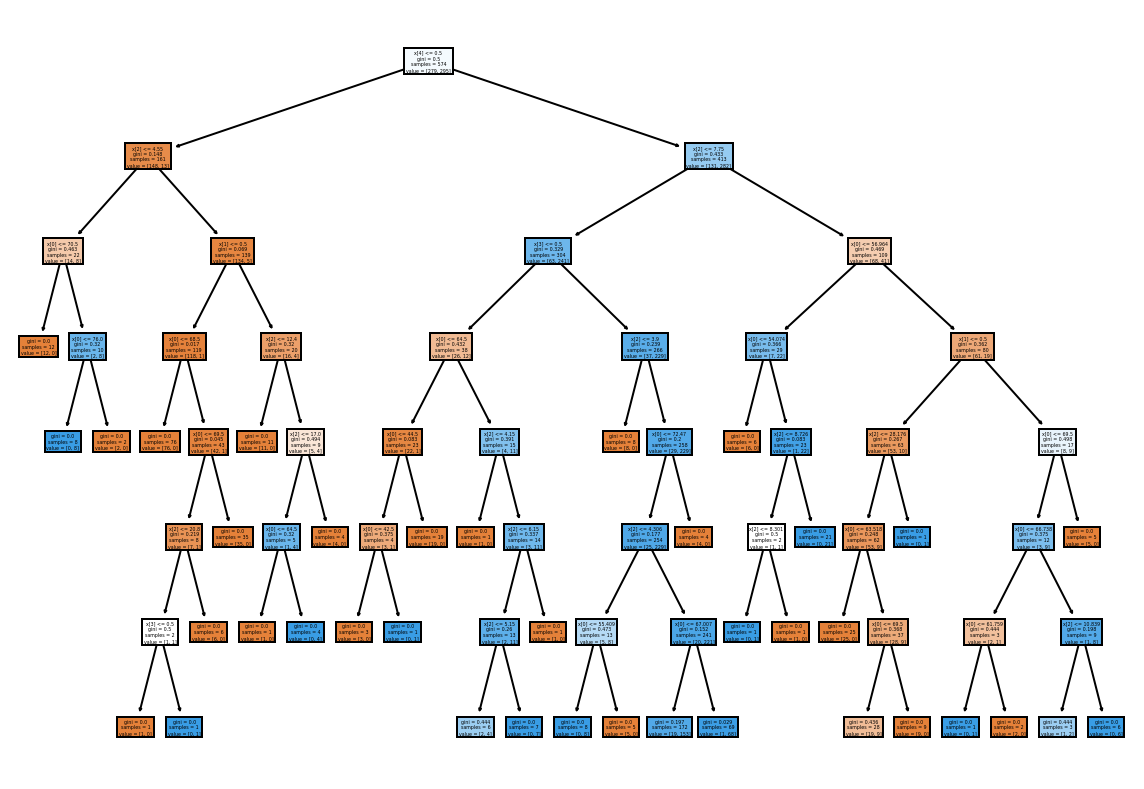

In [69]:
fig = plot_tree(arbol_decision)

Realicen la matriz de confusión para este modelo. Se recomienda utilizar mapa de calor para la visualización. 



In [70]:
# Gráfico de la matriz de confusión
def plot_confusion_matrix(y_test,y_pred):
    
    if len(y_test) != len(y_pred):
        raise ValueError('t_test e y_pred deben tener el mismo tamaño')  #Este caso creo que nunca se llega a dar
    
    # Calculamos la matriz de confusión
    matriz_confusion = confusion_matrix(y_test,y_pred)
    
    #Creamos la figura de la matriz
    fig = sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.xlabel("Predicciones")
    plt.ylabel("Valores Reales")
    plt.title("Matriz de Confusión")
    plt.show()
    
    return fig

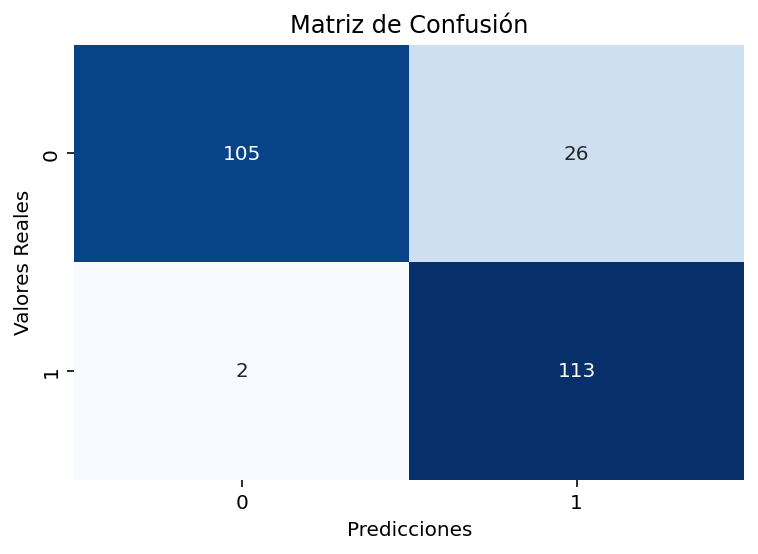

In [71]:
fig = plot_confusion_matrix(y_test,y_pred)

Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.



In [72]:
def evaluate_model(model,y_test, y_pred):
    # Calculamos la accuracy / presición
    accuracy = accuracy_score(y_test,y_pred)

    # Calculamos el recall / exhaustividad
    recall = recall_score(y_test, y_pred, average= None)

    # Calculamos el F1 score
    f1_score_metric = f1_score(y_test, y_pred, average= None)

    # Hacemos la Validación Cruzada
    cross_score = cross_val_score(model, x, y, cv=5)

    # Diccionario con las métricas
    metrics = {"accuracy": accuracy,
               "recall": recall,
               "f1_score": f1_score_metric,
               "cross_score": cross_score}
    
    return metrics

In [73]:
metricas = evaluate_model(arbol_decision,y_test,y_pred)
metricas

{'accuracy': 0.8861788617886179,
 'recall': array([0.80152672, 0.9826087 ]),
 'f1_score': array([0.88235294, 0.88976378]),
 'cross_score': array([0.87195122, 0.90853659, 0.89634146, 0.8902439 , 0.93902439])}

Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo



In [74]:
# Diagrama de importancia
def plot_feature_importance(arbol_decision):
    
    # Validamos que sea un Arbol de Decision
    if not isinstance(arbol_decision, tree.DecisionTreeClassifier):
        raise ValueError("arbol_decision debe ser un objeto válido del tipo DecissionTreeClassifier")

    plt.figure(figsize=(15,15))

    # Obtenemos las variables de importancia del árbol
    importances = arbol_decision.feature_importances_
    columns = x.columns

    # Graficamos
    importance_bp = sns.barplot(x = columns, y = importances)
    plt.title('Importancia de cada feature', fontsize = 15)
    
    return importance_bp

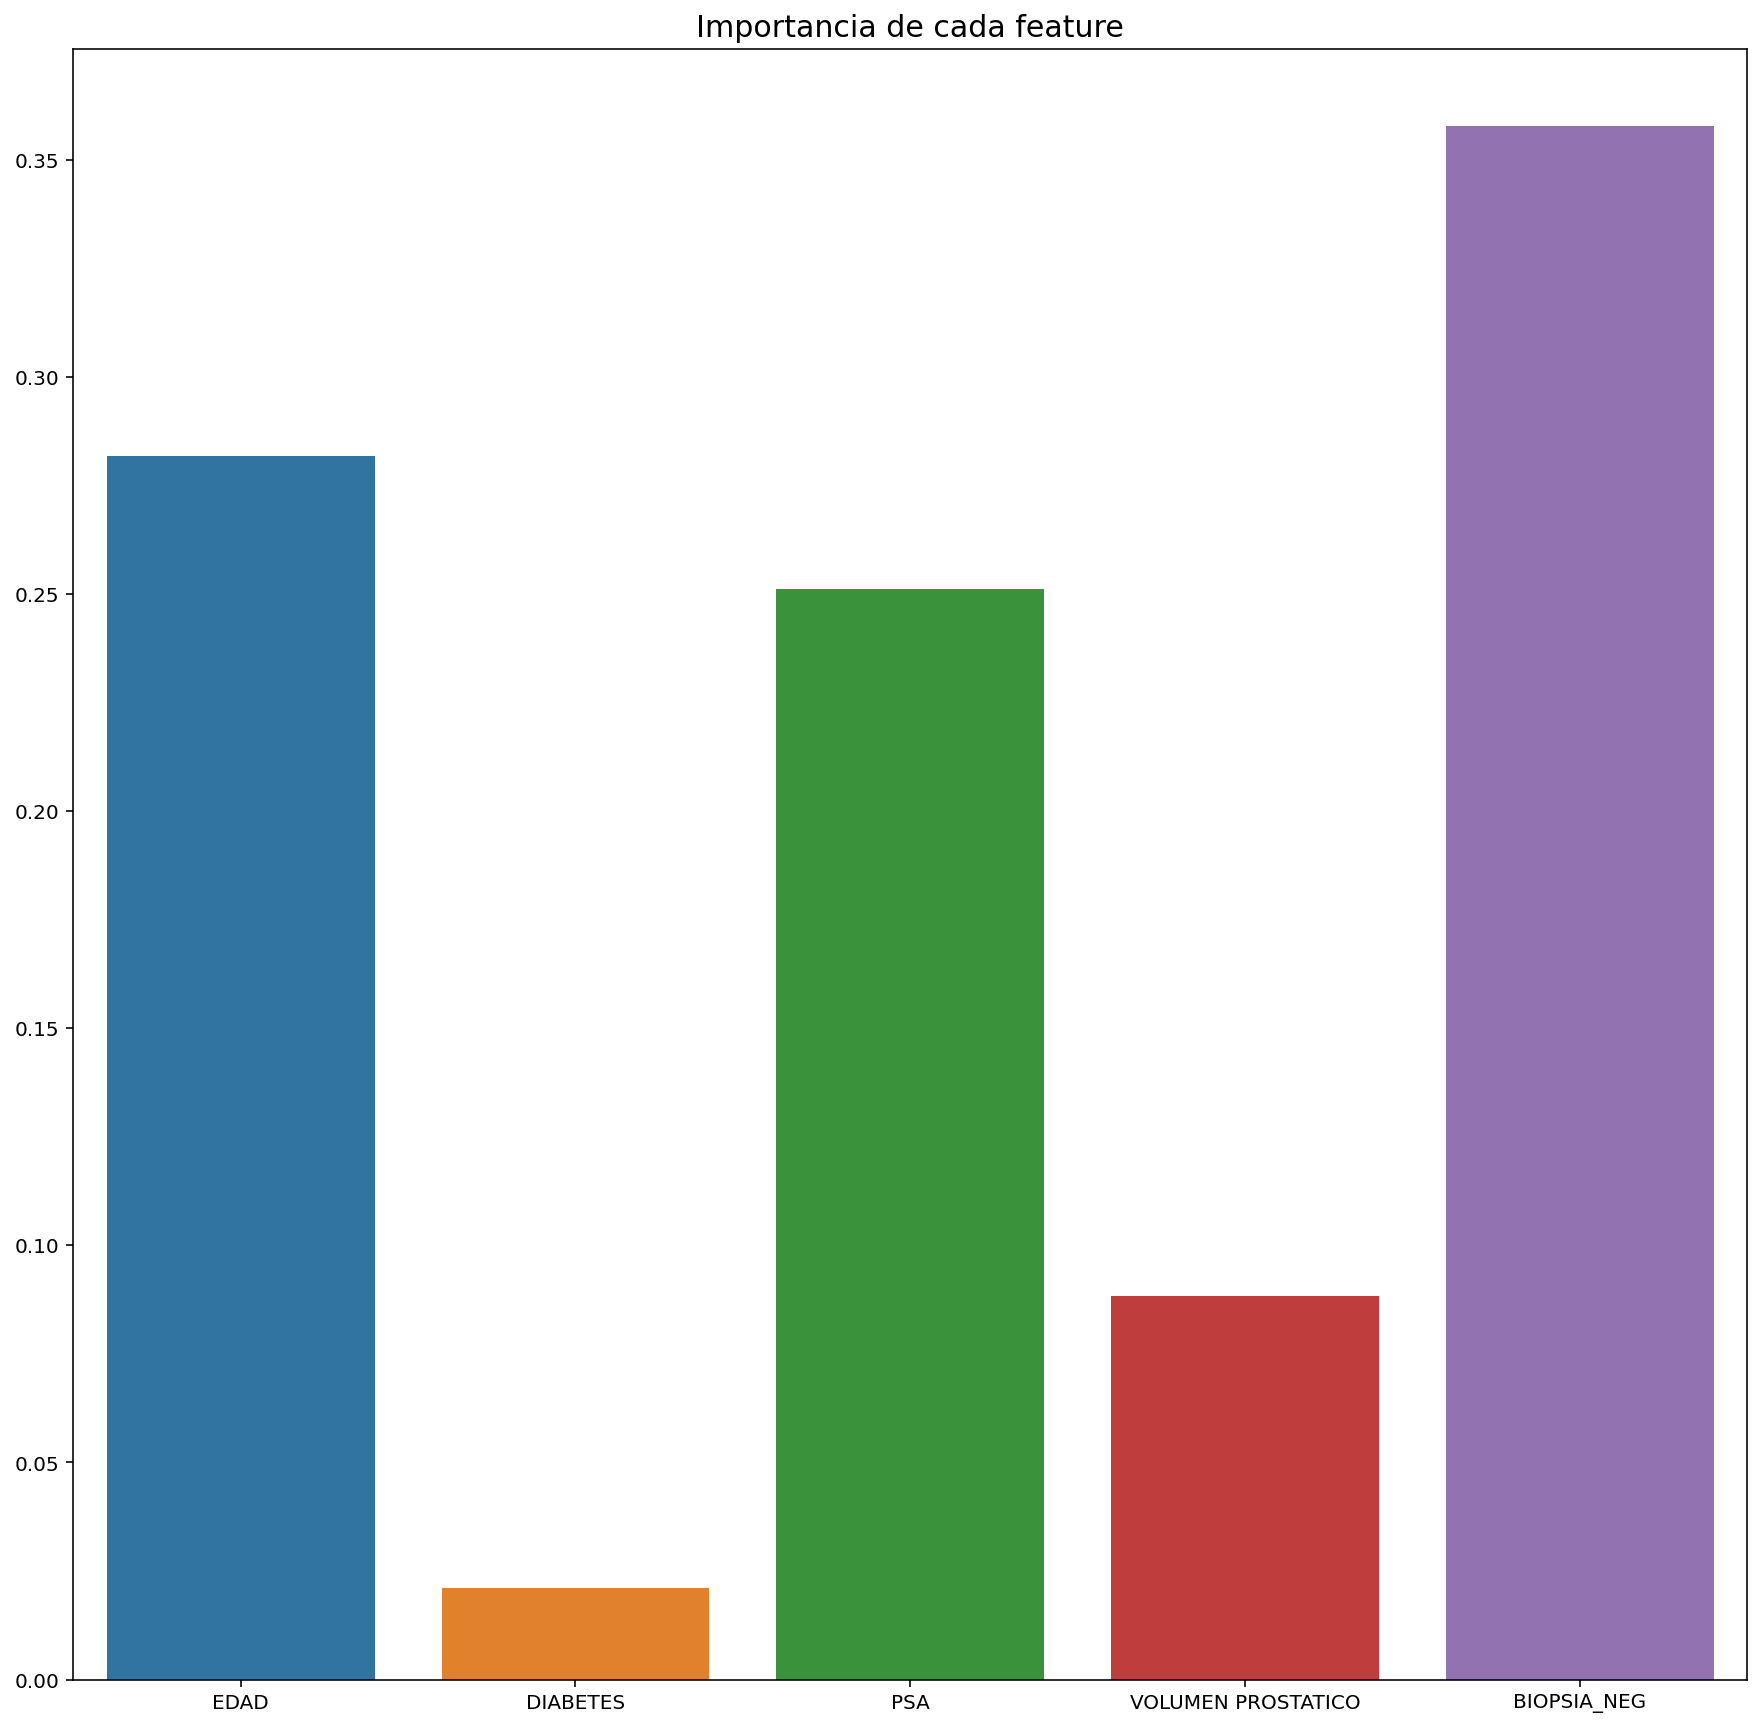

In [75]:
importance = plot_feature_importance(arbol_decision)

Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 



In [76]:
# Evaluación de valores para la profundidad del árbol
def evaluate_max_depth(x_train, y_train, x_test, y_test):
    ## Se puede validar si train y test tienen el mismo Shape

    # Inicializamos listas vacías para guardas el training y testing accouracy/precision
    train_prec =  []
    test_prec = []
    max_deep_list = list(range(3, 30))

    # Recorre los valores de máxima profundidad
    for deep in max_deep_list:
        clf_3 = DecisionTreeClassifier(max_depth=deep, criterion='entropy')
        clf_3.fit(x_train, y_train)
        train_prec.append(clf_3.score(x_train, y_train))
        test_prec.append(clf_3.score(x_test, y_test))

    # Creamos la figura
    plt.figure(figsize=(12,7))
    plt.plot(max_deep_list, train_prec, color='r', label='Set de entrenamiento')
    plt.plot(max_deep_list, test_prec, color='b', label='Set de testeo')
    plt.title('Gráfico de ajuste del árbol de decision', fontsize = 15)
    plt.legend()
    plt.ylabel('Exactitud')
    plt.xlabel('Profundidad')
    plt.show()

    # Buscamos la profundidad óptima
    max_index = np.argmax(test_prec)
    optimal_test_accuracy = test_prec[max_index]   
    min_index = np.argmin(np.abs(test_prec - optimal_test_accuracy))
    optimal_max_depth = max_deep_list[min_index]
    
    # Cramos una lista que contenta la profundidad óptima y su precisión.
    output = [optimal_max_depth, optimal_test_accuracy]
    
    # Return the output list
    return output

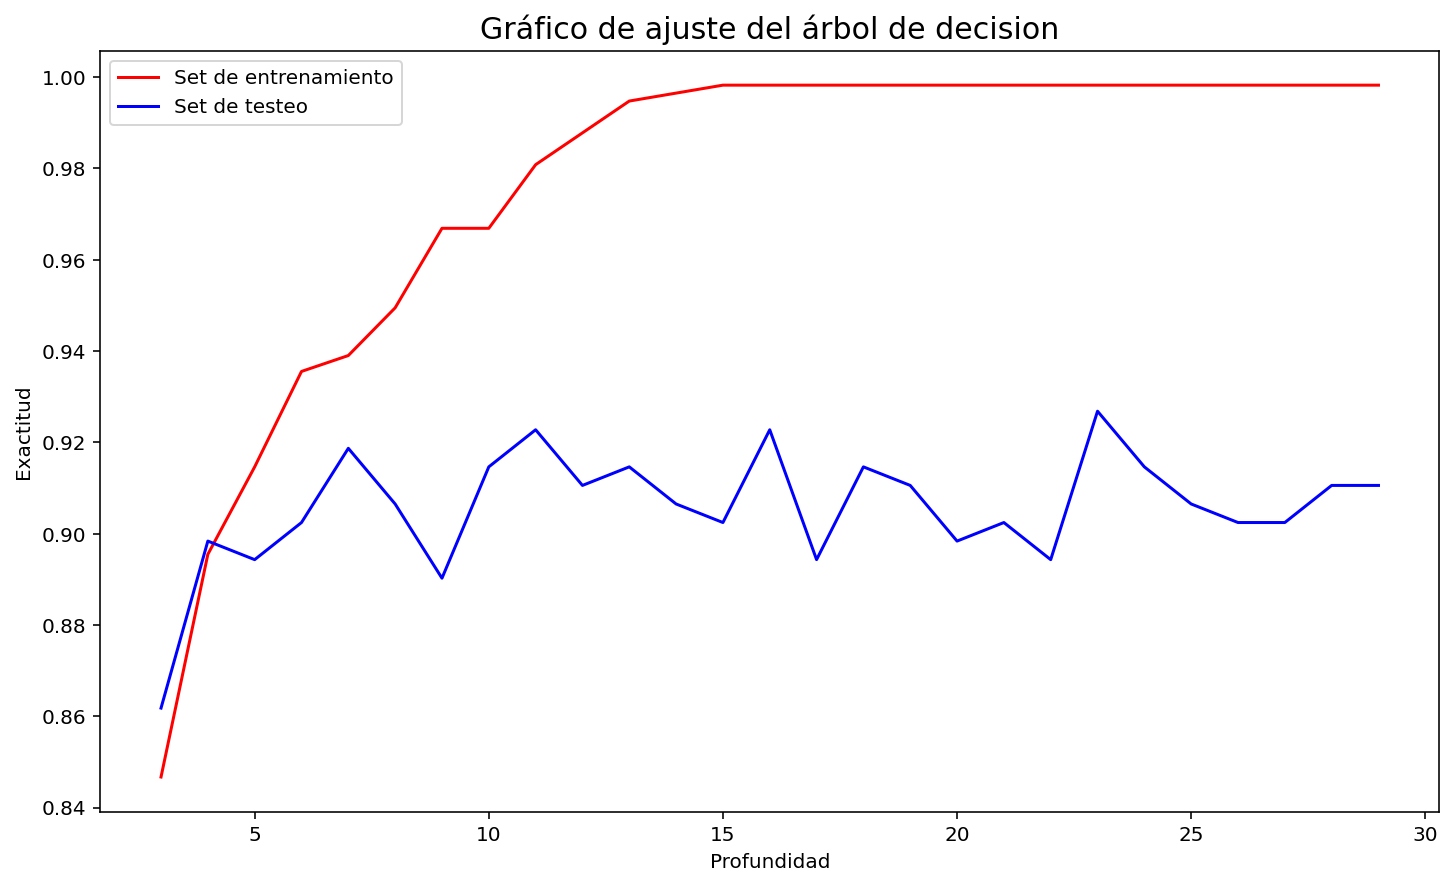

In [77]:
optimal_depth = evaluate_max_depth(x_train, y_train, x_test, y_test)

In [78]:
# Profundidad óptima encontrada por la función
optimal_depth

[23, 0.926829268292683]

Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 



In [79]:
# Arbol de Decisión con K arbitrario = 7

arbol_profundidad_7, y_pred_prueba = decision_tree(x_train, x_test, y_train, 7)
metrics_prueba1 = evaluate_model(arbol_profundidad_7, y_test, y_pred_prueba)
metrics_prueba1


{'accuracy': 0.8861788617886179,
 'recall': array([0.80152672, 0.9826087 ]),
 'f1_score': array([0.88235294, 0.88976378]),
 'cross_score': array([0.87195122, 0.90853659, 0.89634146, 0.8902439 , 0.93902439])}

{'accuracy': 0.8943089430894309, 'recall': array([0.80916031, 0.99130435]), 'f1_score': array([0.8907563, 0.8976378]), 'cross_score': array([0.8902439 , 0.91463415, 0.89634146, 0.89634146, 0.8902439 ])}


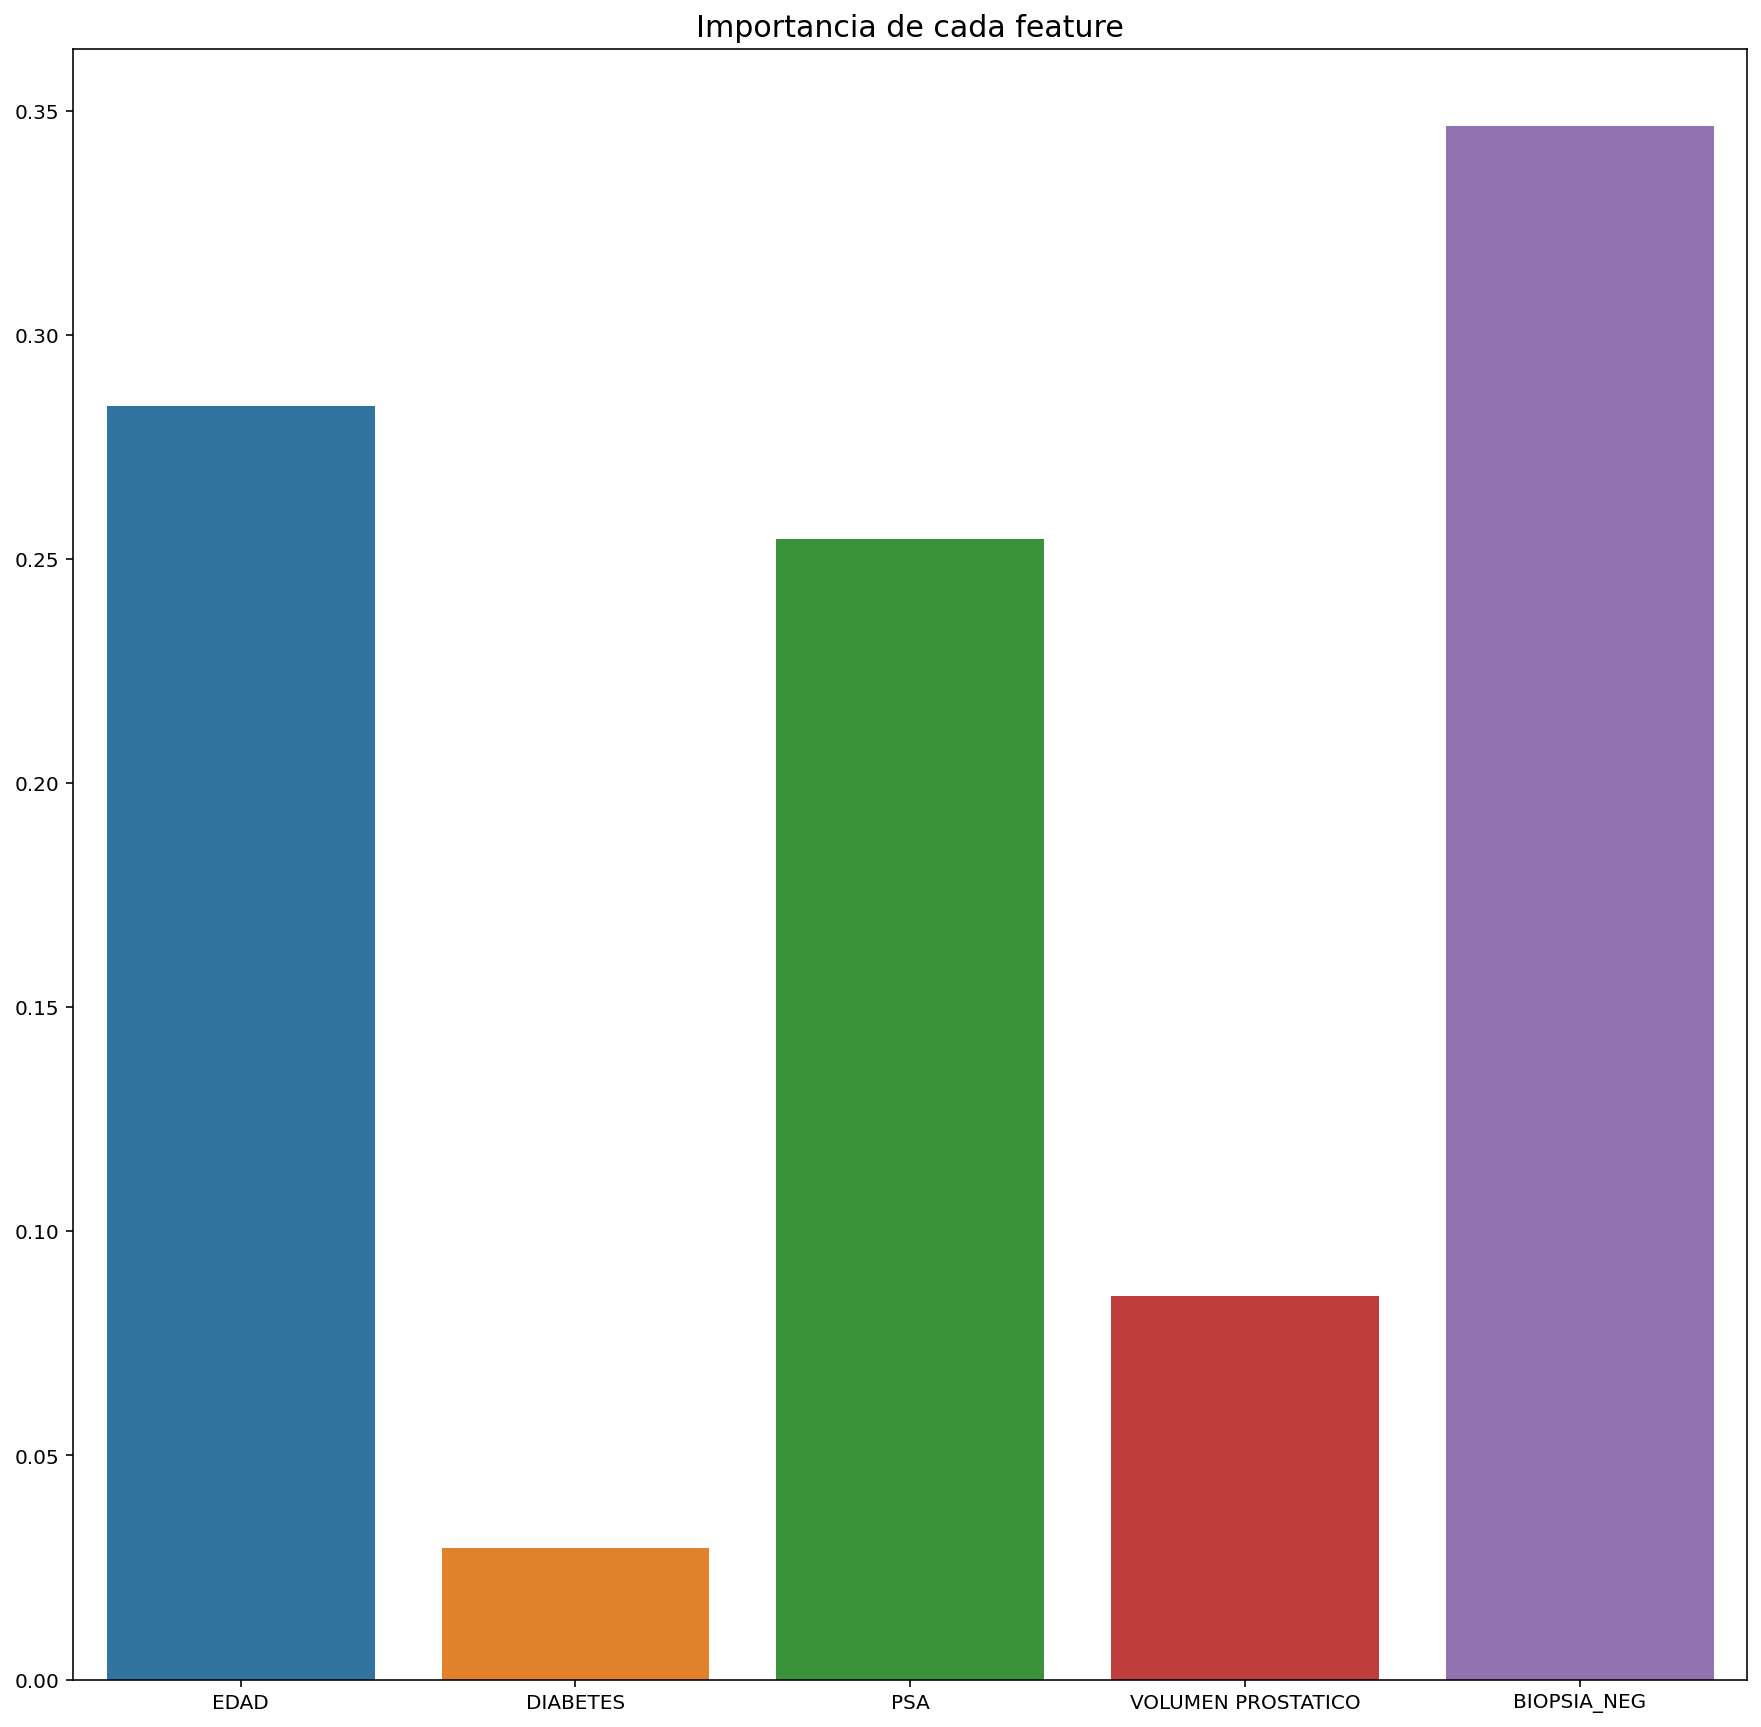

In [80]:
# Arbol de Decisión con K visto en Grafica = 8

arbol_profundidad_8, y_pred_prueba = decision_tree(x_train, x_test, y_train, 8)
metrics_prueba2 = evaluate_model(arbol_profundidad_8, y_test, y_pred_prueba)
print(metrics_prueba2)

importance = plot_feature_importance(arbol_profundidad_8)

In [81]:
# Poda del árbol

# Realiza validación cruzada para encontrar el valor óptimo de ccp_alpha
alphas = arbol_profundidad_8.cost_complexity_pruning_path(x_train, y_train)["ccp_alphas"]
cv_scores = []
for alpha in alphas:
    arbol_prueba_8 = DecisionTreeClassifier(ccp_alpha=alpha)
    scores = cross_val_score(arbol_prueba_8, x_train, y_train, cv=5)
    cv_scores.append(scores.mean())

# Encuentra el valor óptimo de ccp_alpha que minimiza el error de validación cruzada
optimal_alpha = alphas[cv_scores.index(max(cv_scores))]

# Podar el árbol con el valor óptimo de ccp_alpha
pruned_tree = DecisionTreeClassifier(ccp_alpha=optimal_alpha)
pruned_tree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0016664141796697474)

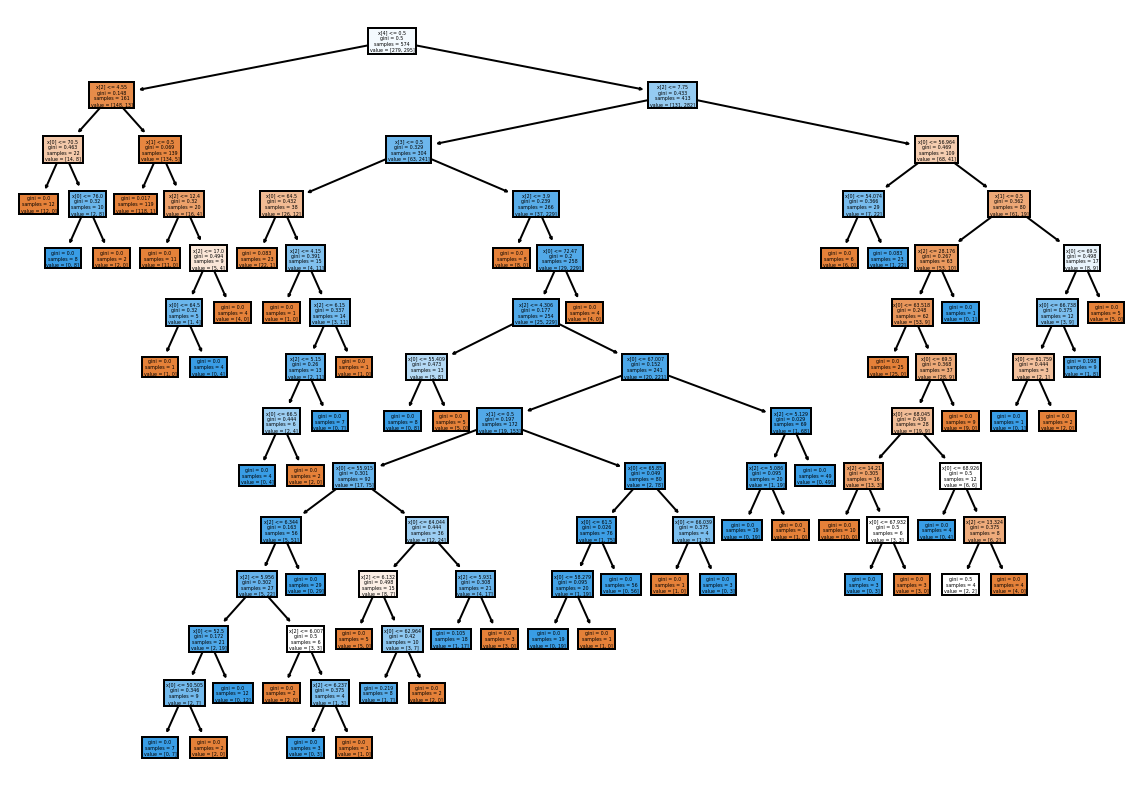

In [82]:
fig = plot_tree(pruned_tree)

In [83]:
metricas = evaluate_model(pruned_tree,y_test,y_pred)
metricas

{'accuracy': 0.8861788617886179,
 'recall': array([0.80152672, 0.9826087 ]),
 'f1_score': array([0.88235294, 0.88976378]),
 'cross_score': array([0.89634146, 0.89634146, 0.93292683, 0.91463415, 0.92073171])}

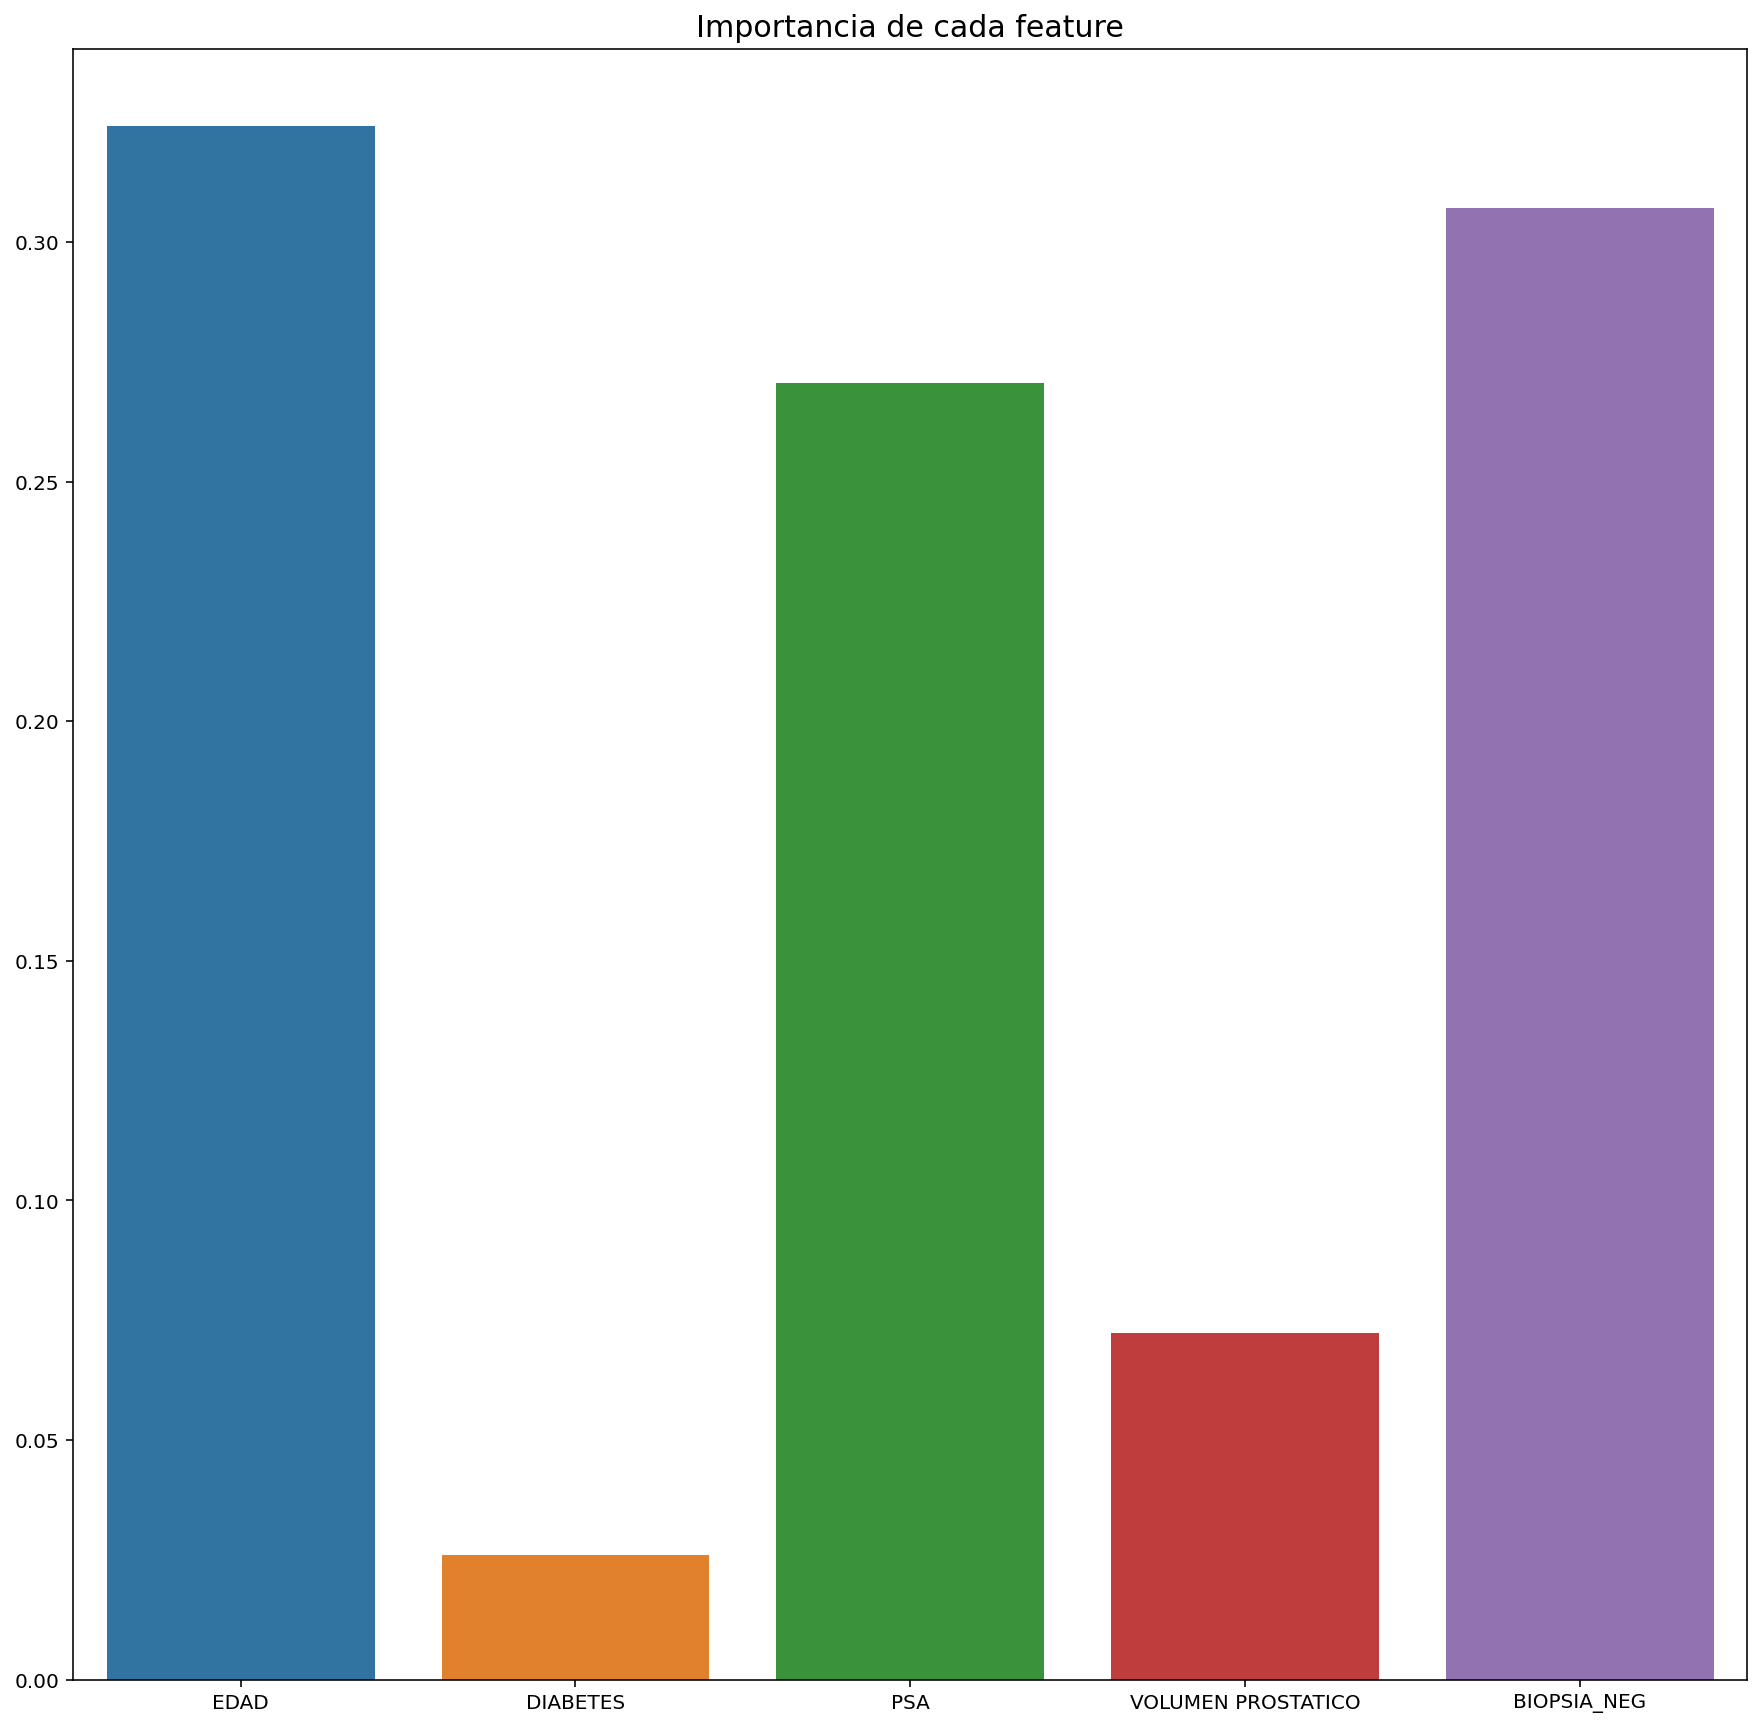

In [84]:
importance_pruned = plot_feature_importance(pruned_tree)

In [85]:
profundidad_maxima = pruned_tree.tree_.max_depth
profundidad_maxima

13

In [86]:
# En este caso, al no tener una profundidad extensa el árbol de decisión con su valor óptimo de 8 en profundidad,
# no se ve por conveniente realizar la poda del árbol, que si bien se elije un árbol con mejor resultados en cross validation,
# y profundidad de 13, la precisión del modelo se reduce por lo cual se opta por el valor óptimo de 8 en profundidad.

Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 



In [87]:
knn_model = KNeighborsClassifier(n_neighbors=5) 
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [88]:
y_pred = knn_model.predict(x_test)

# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud (Accuracy): {accuracy}')

Exactitud (Accuracy): 0.8780487804878049


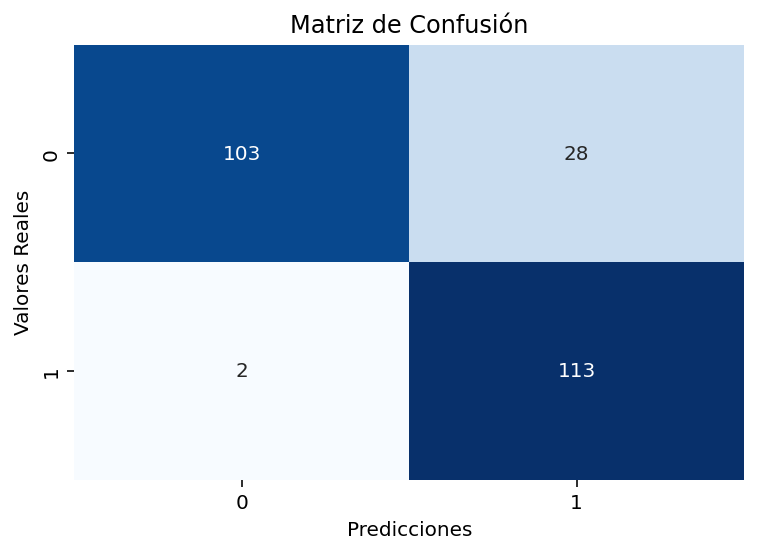

In [89]:
# Crear una matriz de confusión
confusion = confusion_matrix(y_test, y_pred)

# Visualizar la matriz de confusión con Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.title("Matriz de Confusión")
plt.show()

In [90]:
# Listas para almacenar las puntuaciones medias y desviaciones estándar de entrenamiento y prueba
knn_train_scores_mean = []
knn_train_scores_std = []
knn_test_scores_mean = []
knn_test_scores_std = []

# Rango de número de vecinos (de 1 a 19)
n_vecinos = np.arange(1, 20, 1)

i = 0
i_max = len(n_vecinos)

# Iterar a través de diferentes valores de número de vecinos
for vecinos in n_vecinos:
    i = i + 1

    # Crear un clasificador K-Vecinos con el número actual de vecinos
    clf = KNeighborsClassifier(n_neighbors=vecinos)

    # Realizar validación cruzada con el clasificador K-Vecinos
    knn_scores = cross_validate(clf, x_train, y_train, cv=5, return_train_score=True, n_jobs=-1)

    # Almacenar las puntuaciones promedio de entrenamiento y prueba, y sus desviaciones estándar
    knn_train_scores_mean.append(knn_scores['train_score'].mean())
    knn_train_scores_std.append(knn_scores['train_score'].std())
    
    knn_test_scores_mean.append(knn_scores['test_score'].mean())
    knn_test_scores_std.append(knn_scores['test_score'].std())

    # Limpiar la salida para mostrar el progreso
    clear_output(wait=True)
    print('Completado: ' + str(round(i / i_max * 100, 2)) + '%')

# Convertir las listas de puntuaciones en arreglos NumPy para su posterior análisis
knn_train_scores_mean = np.array(knn_train_scores_mean)
knn_train_scores_std = np.array(knn_train_scores_std)
knn_test_scores_mean = np.array(knn_test_scores_mean)
knn_test_scores_std = np.array(knn_test_scores_std)

Completado: 100.0%


Encuentre el valor óptimo para k



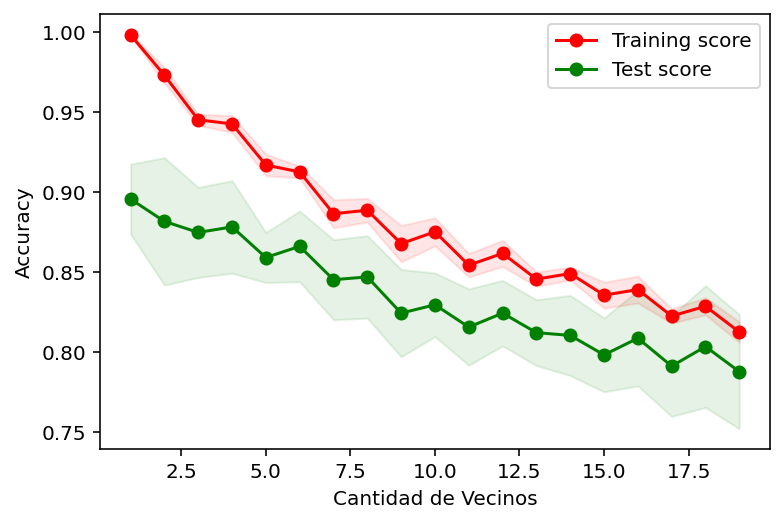

In [91]:
plt.fill_between(n_vecinos, knn_train_scores_mean - knn_train_scores_std,
                 knn_train_scores_mean + knn_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(n_vecinos, knn_test_scores_mean - knn_test_scores_std,
                 knn_test_scores_mean + knn_test_scores_std, alpha=0.1, color="g")

plt.plot(n_vecinos, knn_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(n_vecinos, knn_test_scores_mean, 'o-', color="g",
         label="Test score")

plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Cantidad de Vecinos')
plt.show()

De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 



R/

Para mejorar el rendimiento de un modelo de árbol de decisión, se pueden considerar varias estrategias y técnicas: Ajuste de hiperparámetros, Regularización, Ensambles de árboles, entre otros. En este caso, utilizamos la estrategia de búsqueda grid junto con validación cruzada para encontrar la combinación óptima de hiperparámetros para nuestro conjunto de datos, encontrango que K\_depth = 8 performa mejor que un K elegido aleatoriamente. 
